# Getting Started with NetworkX  
["NetworkX is a Python package for the creation, manipulation, and study of the structure, dynamics, and functions of complex networks."](https://networkx.github.io/)

In [1]:
import pandas as pd
import numpy as np
import networkx as nx

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# setting up default plotting parameters
%matplotlib inline

plt.rcParams['figure.figsize'] = [20.0, 7.0]
plt.rcParams.update({'font.size': 22,})

sns.set_palette('viridis')
sns.set_style('white')
sns.set_context('talk', font_scale=0.8)

## What is a Network?  
A network is a graph and a graph is a representation of connections (nodes) among a set of items (edges). 
Examples of networks:
* Social (Friendship Network)
* Transportation (Network of Flights)
* Information (Network of Wikipedia Articles)
* Biologic (Protein Interaction Network)

### Types of Networks
* Symmetric (Undirected): Edges have no direction
* Asymmetric (Directed): Edges have direction  
* Weighted: Edges are assigned a weight
* Signed: Edges are assigned a positive or negative sign

### Multigraphs  
* A network with parallel edges - where multiple edges can connect to the same node

### Creating a graph  

In [3]:
# create an empty graph with no nodes or edges
G = nx.Graph()

In [4]:
# add one node at a time
G.add_node(1)

# add a list of nodes
G.add_nodes_from([2, 3])

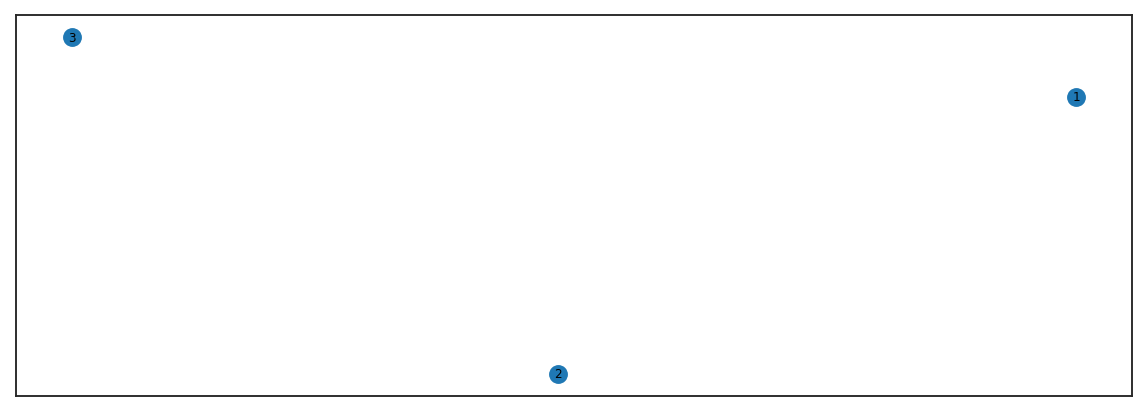

In [5]:
# draw the network G
nx.draw_networkx(G)

In [6]:
# add one edge at a time
G.add_edge(1,2)

# add a list of edges
G.add_edges_from([(0,1),
                  (1,3),
                  (1,2),
                  (2,5),
                  (3, 4),
                  (4, 5),
                  (4, 7),
                  (5, 8),
                  (8, 9)])

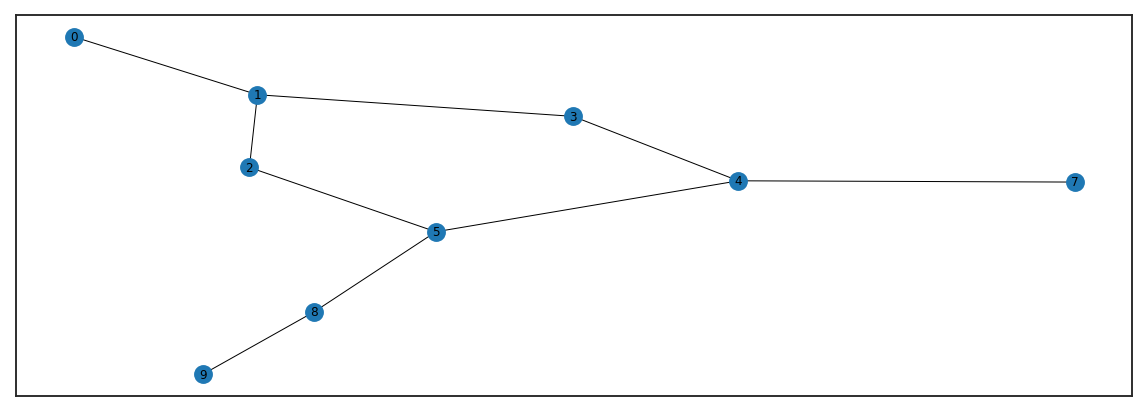

In [7]:
# draw the network G
nx.draw_networkx(G)

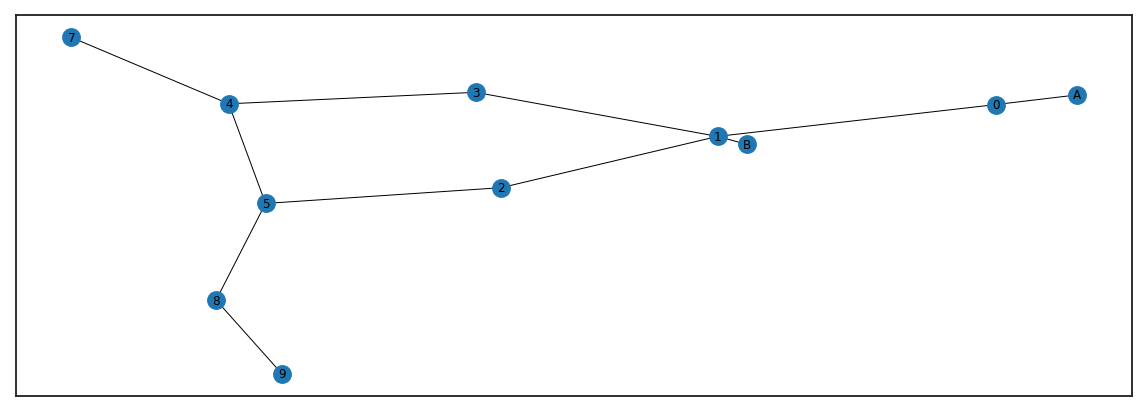

In [8]:
# add weighted edges
G.add_edge('A', 0, weight=10)
G.add_edge('B', 1, weight=100)

# draw the network G
nx.draw_networkx(G)

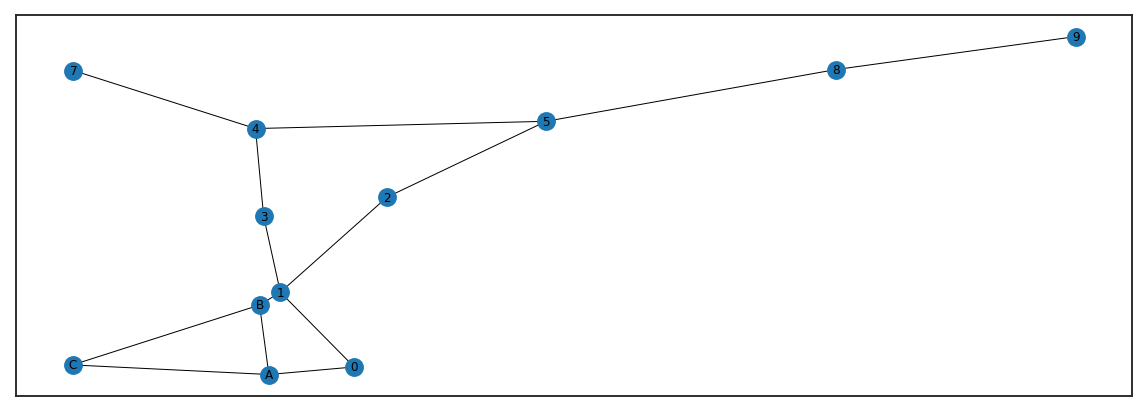

In [20]:
# add signs
G.add_edge('A', 'B', sign='+')
G.add_edge('B', 'C', sign='-')
G.add_edge('A', 'C', sign='-')

# draw the network G
nx.draw_networkx(G)

In [10]:
# create an empty directed multigraph with no nodes or edges
G1 = nx.MultiDiGraph()

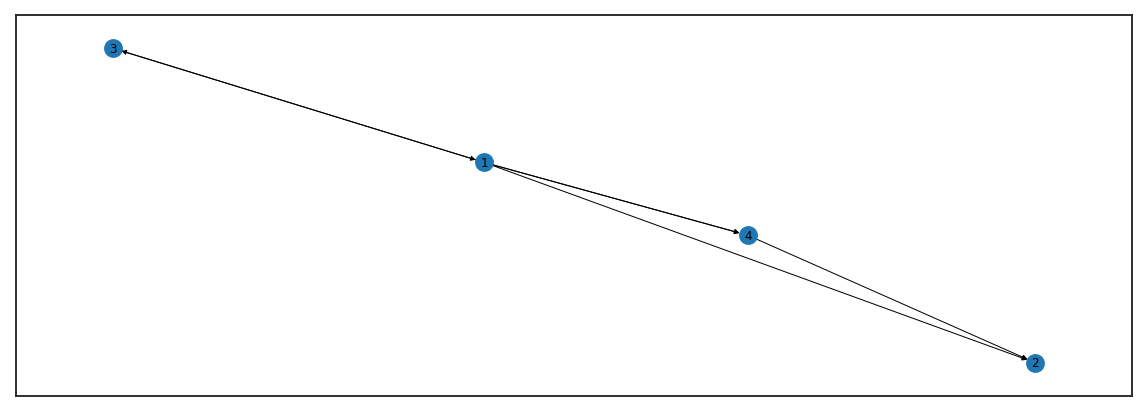

In [11]:
# add edges
G1.add_edge(1, 2, weight=10, relation='primary')
G1.add_edge(1, 3, weight=50, relation='primary')
G1.add_edge(1, 4, weight=20, relation='primary')
G1.add_edge(1, 4, weight=50, relation='secondary')
G1.add_edge(4, 2, weight=60, relation='secondary')
G1.add_edge(3, 1, weight=10, relation='secondary')

# draw the network G1
nx.draw_networkx(G1)

## Edge and Node Attributes


In [12]:
# add node attributes
G.add_node(1, role='primary')
G.add_node(2, role='secondary')

In [13]:
# print list of nodes
list(G.nodes)

[1, 2, 3, 0, 5, 4, 7, 8, 9, 'A', 'B', 'C']

In [14]:
# print all nodes with attributes
list(G.nodes(data=True))

[(1, {'role': 'primary'}),
 (2, {'role': 'secondary'}),
 (3, {}),
 (0, {}),
 (5, {}),
 (4, {}),
 (7, {}),
 (8, {}),
 (9, {}),
 ('A', {}),
 ('B', {}),
 ('C', {})]

In [15]:
# print list of edges
list(G.edges)

[(1, 2),
 (1, 0),
 (1, 3),
 (1, 'B'),
 (2, 5),
 (3, 4),
 (0, 'A'),
 (5, 4),
 (5, 8),
 (4, 7),
 (8, 9),
 ('A', 'B'),
 ('B', 'C')]

In [16]:
# number of connections node A has
G.degree['A']

2

In [17]:
# role of node 1
G.node[1]['role']

'primary'

## Network Connectivity

#### Triadic Closure  
The tendency for people who share connections in a social network to become connected

#### Local Clustering Coefficient
Fraction of pairs of the node's friends that are friends with each other

#### Global Clustering Coefficient  
Measure of clustering on the whole network  

#### Transitivity
Ratio of number of triangles and number of 'open triads' in a network  
Rates nodes with large degree higher


In [21]:
# get clustering coefficient for node A
nx.clustering(G, 'A')

0.3333333333333333

In [22]:
# get clustering coefficient of whole network
nx.average_clustering(G)

0.13888888888888887

In [23]:
# get transitivity of network
nx.transitivity(G)

0.13043478260869565